In [1]:
# 구글 드라이버 이용
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#필요 라이브러리 임포트
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['axes.unicode_minus'] = False
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
import math as m

In [0]:
# 파일 불러오기 예시
# pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/train.csv')

# 4319
train_dt = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/train.csv').set_index('id')
test_dt = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/test.csv').set_index('id')

### 분석 방법

1. Y00 - Y17 4300개의 데이터로 각 feature 430개의 값을 예측 
    - Y18 값과 유사한 feature 찾기
    - Y06,Y09,Y12,Y16이 Y18과의 mse값이 낮고, 상관도가 높다.

2. Y06,Y09,Y12,Y16의 조합으로 진짜 Y18을 예측
    - mse가 가장 낮은 조합을 사용

3.  Y_train 값 설정
  - 2번의 조합 + 기존의 Y18로 나머지 test 예측
  - 2번의 조합에서 각각의 Y로 80일 예측 후 평균

4. feature 공학

In [0]:
def predict_test(X_train, y_train, X_test):

  lgb_train = lgb.Dataset(X_train, label=y_train)

  lgb_param = {
      "objective":"regression",
      "metrics":"mae",
      "learning_rate":0.01
  }

  print("cv start")
  cv_result = lgb.cv(
      lgb_param,
      lgb_train,
      num_boost_round=99999,
      nfold=5,
      early_stopping_rounds=10,
      stratified=False,
      verbose_eval=10 
  )

  print("train start")
  lgb_model = lgb.train(
      lgb_param,
      lgb_train,
      num_boost_round=len(cv_result["l1-mean"])
  )

  pred = lgb_model.predict(X_test)

  feature_importance = pd.DataFrame({'name' : lgb_model.feature_name(),
                                   'importance' : lgb_model.feature_importance()})\
                                   .sort_values(by = 'importance', ascending = False)
  
  return pred, feature_importance

In [0]:
X_train = train_dt.iloc[:4320, :40]
X_test = train_dt.iloc[4320:, :40]
X = train_dt.iloc[:, :40]
Y_train = train_dt.loc[:4319, ['Y06','Y09','Y12']].mean(axis = 1)
Y_test = train_dt.loc[4320:, ['Y18']]

In [0]:
# # data_processing_lst = []
# # data_processing_lst 불러오기
# data_processing_lst = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data_processing_lst.csv').values.tolist()
# data_processing_lst

In [0]:
# data_processing = []

In [0]:
### Best Processing

def data_processing(X_data):
  X_data['X01'] = X_data[['X01','X06']].mean(axis = 1)
  X_data['X22'] = X_data[['X22','X29']].mean(axis = 1)
  X_data['X05'] = X_data[['X05','X08','X09','X23','X33']].mean(axis = 1)
  X_data['X11'] = X_data[['X11','X34']].mean(axis = 1)
  # 13 삭제 / 14,16,19 0 값 삭제
  X_data = X_data.drop(['X06','X29','X08','X09','X23','X33','X34','X13','X14','X16','X19'], axis = 1)
  return X_data

In [0]:
# Y_combination = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Y_conbination_lst.csv').values.tolist()
# Y_combination

In [11]:
data_processing = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data_processing.csv').values.tolist()
data_processing

[['Basic2_Y060912_drop_mean_temp_humidity', 3.647894837976495],
 ['Basic2', 3.647894837976495],
 ['Basic1_drop_plus_temp_humidity', 3.647894837976495],
 ['Basic2_Y060912', 3.6513267182311018],
 ['Basic2', 3.6513267182311018],
 ['Basic1_Y060912_drop_plus_temp_humidity', 3.6513267182311018],
 ['Basic2', 3.772853767942077],
 ['Basic2_Y060912_Mean_temp_humidity', 3.784112767312618],
 ['Basic1_drop_plus_temp_humidity', 3.907666617031032],
 ['Basic1_mean_temp_drop_temp', 4.253730398019279],
 ['Basic1_mean_temp_humidity_drop_temp_humidity_plus_temp_humidity',
  4.35017281034993],
 ['Basic1_mean_temp_humidity_drop_temp_humidity_plus_temp_humidity',
  4.35017281034993],
 ['Basic1_mean_temp_humidity_drop_temp_humidity_plus_temp_humidity',
  4.35017281034993],
 ['Best_plus_NS_EW_min', 4.369218495377544],
 ['Best_plus_NS_EW_min_Mean_CumRain', 4.409326212426367],
 ['Best_plus_NS_EW_min_Mean_CumRain', 4.4095159156936115],
 ['Basic_plus_min_cos', 4.5591880488118575],
 ['Basic1_mean_temp_humidity_drop

In [0]:
# lst = [['Y06'], ['Y09'], ['Y12'], ['Y16'], ['Y06', 'Y09'], ['Y06', 'Y12'], ['Y06', 'Y16'], ['Y09', 'Y12'], ['Y09', 'Y16'], ['Y12', 'Y16'], ['Y06', 'Y09', 'Y12'], ['Y06', 'Y09', 'Y16'], ['Y06', 'Y12', 'Y16'], ['Y09', 'Y12', 'Y16'], ['Y06', 'Y09', 'Y12', 'Y16']]

# for i in lst:
#   # N = i.append(['Y15'])
#   # print(N)
#   tmp = i + ['Y15']
#   print(tmp)

In [0]:
# lst = [['Y06'], ['Y09'], ['Y12'], ['Y16'], ['Y06', 'Y09'], ['Y06', 'Y12'], ['Y06', 'Y16'], ['Y09', 'Y12'], ['Y09', 'Y16'], ['Y12', 'Y16'], ['Y06', 'Y09', 'Y12'], ['Y06', 'Y09', 'Y16'], ['Y06', 'Y12', 'Y16'], ['Y09', 'Y12', 'Y16'], ['Y06', 'Y09', 'Y12', 'Y16']]

# for Y in lst:
#   print(Y)s
#   # Y = ['Y12', 'Y16']

#   X_train = train_dt.iloc[:4320, :40]
#   X_test = train_dt.iloc[4320:, :40]
#   X = train_dt.iloc[:, :40]
#   Y_train = train_dt.loc[:4319, Y].mean(axis = 1)
#   Y_test = train_dt.loc[4320:, ['Y18']]


#   new_X = data_processing1(X.copy())
#   X_train = new_X.iloc[:4320, :40]
#   X_test = new_X.iloc[4320:, :40]
#   Y_pred, feature_importance = predict_test(X_train, Y_train, X_test)


#   Y_test.index = range(len(Y_pred))
#   plt.plot(Y_pred)
#   plt.plot(Y_test['Y18'])
#   mse = ((Y_pred - np.array(Y_test['Y18']))**2).sum()
#   # data_processing_lst.append(['Drop___daily_cumulative_precipitation___local_air_pressure___barometric_pressure___cumulative_daily_insolation___wind_speed___Mean_wind_speed___wind_direction___North_South___East_West___Mean_cumulative_daily_insolation___wind_speed___North_South___East_West___Processing_wind_direction___wind_direction*wind_speed',mse])
#   Y_combination.append([Y,mse])
#   print(mse)
#   print(feature_importance)

In [0]:
# Y_conbination_lst = pd.DataFrame(Y_combination, columns = ['name','mse']).set_index('name').sort_values('mse')
# Y_conbination_lst.to_csv('/content/gdrive/My Drive/Colab Notebooks/Y_conbination_lst.csv')
# Y_conbination_lst.head(15)

In [85]:
train_dt.columns[-19:-1]

Index(['Y00', 'Y01', 'Y02', 'Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08', 'Y09',
       'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17'],
      dtype='object')

In [0]:
### Best
X_train = train_dt.iloc[:4320, :40]
X_test = train_dt.iloc[4320:, :40]
X = train_dt.iloc[:, :40]
# 상관도 0.8이상인 Y값 평균
Y_train = train_dt.loc[:4319, ['Y01', 'Y02', 'Y06', 'Y07','Y09','Y10', 'Y11', 'Y12', 'Y13', 'Y15', 'Y16', 'Y17']].mean(axis = 1)
Y_test = train_dt.loc[4320:, ['Y18']]

def data_processing_(X_data):
  # 풍향 North_South / East_West
  # X13은 영향이 없다고 판단
  # X_data['North_South_X15'] = X['X15'].apply(lambda x : m.sin(m.radians(x)))
  # X_data['East_West_X15'] = X['X15'].apply(lambda x : m.cos(m.radians(x)))

  # X_data['North_South_X17'] = X['X17'].apply(lambda x : m.sin(m.radians(x)))
  # X_data['East_West_X17'] = X['X17'].apply(lambda x : m.cos(m.radians(x)))

  # X_data['North_South_X25'] = X['X25'].apply(lambda x : m.sin(m.radians(x)))
  # X_data['East_West_X25'] = X['X25'].apply(lambda x : m.cos(m.radians(x)))

  # X_data['North_South_X35'] = X['X35'].apply(lambda x : m.sin(m.radians(x)))
  # X_data['East_West_X35'] = X['X35'].apply(lambda x : m.cos(m.radians(x)))

  # 현지 기압 평균
  X_data['Mean_01_06'] = X_data[['X01','X06']].mean(axis = 1)
  X_data['Mean_22_29'] = X_data[['X22','X29']].mean(axis = 1)
  # 해면 기압 평균
  X_data['Mean_05_08_09_23_33'] = X_data[['X05','X08','X09','X23','X33']].mean(axis = 1)
  # 누적 일사량 평균
  X_data['Mean_11_34'] = X_data[['X11','X34']].mean(axis = 1)
  
  # 풍향 삭제
  X_data = X_data.drop(['X13'], axis = 1) # ,'X15','X17','X25','X35'
  # 현지 기압 삭제
  X_data = X_data.drop(['X01','X06','X22','X29'], axis = 1)
  # 해면 기압 삭제
  X_data = X_data.drop(['X05','X08','X09','X23','X33'], axis = 1)
  # 누적 일사량 삭제
  X_data = X_data.drop(['X11','X14','X16','X19','X34'], axis = 1)

  return X_data


#   ### Best Processing

# def data_processing(X_data):
#   X_data['X01'] = X_data[['X01','X06']].mean(axis = 1)
#   X_data['X22'] = X_data[['X22','X29']].mean(axis = 1)
#   X_data['X05'] = X_data[['X05','X08','X09','X23','X33']].mean(axis = 1)
#   X_data['X11'] = X_data[['X11','X34']].mean(axis = 1)
#   # 13 삭제 / 14,16,19 0 값 삭제
#   X_data = X_data.drop(['X06','X29','X08','X09','X23','X33','X34','X13','X14','X16','X19'], axis = 1)
#   return X_data

In [0]:
### Best + North / East
X_train = train_dt.iloc[:4320, :40]
X_test = train_dt.iloc[4320:, :40]
X = train_dt.iloc[:, :40]
Y_train = train_dt.loc[:4319, ['Y01', 'Y02', 'Y06', 'Y07','Y09','Y10', 'Y11', 'Y12', 'Y13', 'Y15', 'Y16', 'Y17']].mean(axis = 1)
Y_test = train_dt.loc[4320:, ['Y18']]

def data_processing_(X_data):
  # 풍향 North_South / East_West
  # X13은 영향이 없다고 판단
  X_data['North_South_X15'] = X['X15'].apply(lambda x : m.sin(m.radians(x)))
  X_data['East_West_X15'] = X['X15'].apply(lambda x : m.cos(m.radians(x)))

  X_data['North_South_X17'] = X['X17'].apply(lambda x : m.sin(m.radians(x)))
  X_data['East_West_X17'] = X['X17'].apply(lambda x : m.cos(m.radians(x)))

  X_data['North_South_X25'] = X['X25'].apply(lambda x : m.sin(m.radians(x)))
  X_data['East_West_X25'] = X['X25'].apply(lambda x : m.cos(m.radians(x)))

  X_data['North_South_X35'] = X['X35'].apply(lambda x : m.sin(m.radians(x)))
  X_data['East_West_X35'] = X['X35'].apply(lambda x : m.cos(m.radians(x)))

  # 현지 기압 평균
  X_data['Mean_01_06'] = X_data[['X01','X06']].mean(axis = 1)
  X_data['Mean_22_29'] = X_data[['X22','X29']].mean(axis = 1)
  # 해면 기압 평균
  X_data['Mean_05_08_09_23_33'] = X_data[['X05','X08','X09','X23','X33']].mean(axis = 1)
  # 누적 일사량 평균
  X_data['Mean_11_34'] = X_data[['X11','X34']].mean(axis = 1)
  
  # 풍향 삭제
  X_data = X_data.drop(['X13','X15','X17','X25','X35'], axis = 1)
  # 현지 기압 삭제
  X_data = X_data.drop(['X01','X06','X22','X29'], axis = 1)
  # 해면 기압 삭제
  X_data = X_data.drop(['X05','X08','X09','X23','X33'], axis = 1)
  # 누적 일사량 삭제
  X_data = X_data.drop(['X11','X14','X16','X19','X34'], axis = 1)

  return X_data


#   ### Best Processing

# def data_processing(X_data):
#   X_data['X01'] = X_data[['X01','X06']].mean(axis = 1)
#   X_data['X22'] = X_data[['X22','X29']].mean(axis = 1)
#   X_data['X05'] = X_data[['X05','X08','X09','X23','X33']].mean(axis = 1)
#   X_data['X11'] = X_data[['X11','X34']].mean(axis = 1)
#   # 13 삭제 / 14,16,19 0 값 삭제
#   X_data = X_data.drop(['X06','X29','X08','X09','X23','X33','X34','X13','X14','X16','X19'], axis = 1)
#   return X_data

In [93]:
new_X = data_processing_(X.copy())
X_train = new_X.iloc[:4320, :40]
X_test = new_X.iloc[4320:, :40]
Y_pred, feature_importance = predict_test(X_train, Y_train, X_test)

cv start
[10]	cv_agg's l1: 6.38808 + 0.0673056
[20]	cv_agg's l1: 5.79625 + 0.0613442
[30]	cv_agg's l1: 5.26131 + 0.0557821
[40]	cv_agg's l1: 4.77839 + 0.0500737
[50]	cv_agg's l1: 4.34228 + 0.0445808
[60]	cv_agg's l1: 3.94767 + 0.0388181
[70]	cv_agg's l1: 3.5913 + 0.0354617
[80]	cv_agg's l1: 3.26979 + 0.0315037
[90]	cv_agg's l1: 2.97985 + 0.0284533
[100]	cv_agg's l1: 2.72014 + 0.0254796
[110]	cv_agg's l1: 2.48831 + 0.0217529
[120]	cv_agg's l1: 2.28066 + 0.0185383
[130]	cv_agg's l1: 2.09421 + 0.0165674
[140]	cv_agg's l1: 1.92706 + 0.0147295
[150]	cv_agg's l1: 1.77655 + 0.0129771
[160]	cv_agg's l1: 1.64091 + 0.0122638
[170]	cv_agg's l1: 1.51904 + 0.0120107
[180]	cv_agg's l1: 1.40985 + 0.0118872
[190]	cv_agg's l1: 1.31238 + 0.0126239
[200]	cv_agg's l1: 1.22537 + 0.0127387
[210]	cv_agg's l1: 1.14812 + 0.0132539
[220]	cv_agg's l1: 1.07907 + 0.0140158
[230]	cv_agg's l1: 1.01733 + 0.0140352
[240]	cv_agg's l1: 0.962538 + 0.0146447
[250]	cv_agg's l1: 0.914403 + 0.0155024
[260]	cv_agg's l1: 0.871

6.711294603085279
                   name  importance
32           Mean_11_34       11846
0                   X00        8871
16                  X32        8332
6                   X12        8042
18                  X37        7988
15                  X31        7914
8                   X20        7867
14                  X30        7596
19                  X38        7420
27      North_South_X35        7378
4                   X07        6938
21      North_South_X15        6806
28        East_West_X35        6731
23      North_South_X17        6680
22        East_West_X15        6650
7                   X18        5906
12                  X27        5870
24        East_West_X17        5834
2                   X03        5581
13                  X28        5438
1                   X02        5149
29           Mean_01_06        5139
25      North_South_X25        5119
11                  X26        5118
26        East_West_X25        4484
10                  X24        4419
30        

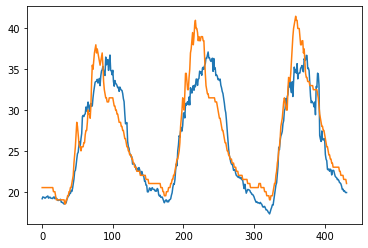

In [94]:
Y_test.index = range(len(Y_pred))
plt.plot(Y_pred)
plt.plot(Y_test['Y18'])
mse = (np.array(list(map(lambda x : 0 if x <= 1 and x >= -1 else x, (Y_pred - np.array(Y_test['Y18']))))) ** 2).mean()
# data_processing_lst.append(['Drop___daily_cumulative_precipitation___local_air_pressure___barometric_pressure___cumulative_daily_insolation___wind_speed___Mean_wind_speed___wind_direction___North_South___East_West___Mean_cumulative_daily_insolation___wind_speed___North_South___East_West___Processing_wind_direction___wind_direction*wind_speed',mse])
data_processing.append(['Best + Y cor > 0.8',mse])
# Y_combination.append([Y,mse])
print(mse)
print(feature_importance)

In [95]:
result = pd.DataFrame(data_processing, columns = ['name','mse']).set_index('name').sort_values('mse')
result.to_csv('/content/gdrive/My Drive/Colab Notebooks/data_processing.csv')
result

,mse
name,
"Best + North, East",6.319988
Best,6.396243
"Best + North, East - 15,17,25,35",6.551470
Best,6.551470
Best + Y cor > 0.8,6.711295
Best + Y_mean,7.873639


In [0]:
# Y_conbination_lst = pd.DataFrame(Y_combination, columns = ['name','mse']).set_index('name').sort_values('mse')
# Y_conbination_lst.to_csv('/content/gdrive/My Drive/Colab Notebooks/Y_conbination_lst.csv')
# Y_conbination_lst.head(15)

In [0]:
# result = pd.DataFrame(data_processing_lst, columns = ['name','mse']).set_index('name').sort_values('mse')
# result.to_csv('/content/gdrive/My Drive/Colab Notebooks/data_processing_lst.csv')
# result.head(15)

In [96]:
Y_combination = ['Y06','Y09','Y12']

X_train = train_dt.iloc[:4320, :40]
X_test = train_dt.iloc[4320:, :40]
X = train_dt.iloc[:, :40]
Y_train = train_dt.loc[:4319, Y_combination].mean(axis = 1)
Y_test = train_dt.loc[4320:, ['Y18']]

# 4300개의 예측값 + Y_의 실제값
before = train_dt[Y_combination].iloc[:-432].mean(axis = 1)
# after = main[[18]].mean(axis = 1)
after = train_dt.iloc[4320:,-1]

X_train = data_processing_(X.copy())
print(len(X_train))

Y_train = pd.concat([before, after],ignore_index=True)
print(len(Y_train))

X_test = data_processing_(test_dt.copy())
print(len(X_test))

4752
4752
11520


In [97]:
Y_pred, feature_importance = predict_test(X_train, Y_train, X_test)

cv start
[10]	cv_agg's l1: 6.2891 + 0.0738417
[20]	cv_agg's l1: 5.71983 + 0.0719771
[30]	cv_agg's l1: 5.20577 + 0.0709848
[40]	cv_agg's l1: 4.74006 + 0.070048
[50]	cv_agg's l1: 4.31941 + 0.069832
[60]	cv_agg's l1: 3.93931 + 0.0690181
[70]	cv_agg's l1: 3.59622 + 0.0671059
[80]	cv_agg's l1: 3.28679 + 0.0662268
[90]	cv_agg's l1: 3.00972 + 0.0656284
[100]	cv_agg's l1: 2.76412 + 0.0646287
[110]	cv_agg's l1: 2.544 + 0.0625467
[120]	cv_agg's l1: 2.34739 + 0.0612401
[130]	cv_agg's l1: 2.17284 + 0.058831
[140]	cv_agg's l1: 2.01725 + 0.05619
[150]	cv_agg's l1: 1.8774 + 0.0517346
[160]	cv_agg's l1: 1.753 + 0.0482378
[170]	cv_agg's l1: 1.64096 + 0.0445943
[180]	cv_agg's l1: 1.54196 + 0.0417396
[190]	cv_agg's l1: 1.45333 + 0.0395078
[200]	cv_agg's l1: 1.37372 + 0.038574
[210]	cv_agg's l1: 1.30311 + 0.0377492
[220]	cv_agg's l1: 1.23939 + 0.0365165
[230]	cv_agg's l1: 1.18317 + 0.0366103
[240]	cv_agg's l1: 1.13261 + 0.0364306
[250]	cv_agg's l1: 1.08795 + 0.0366816
[260]	cv_agg's l1: 1.04765 + 0.035915

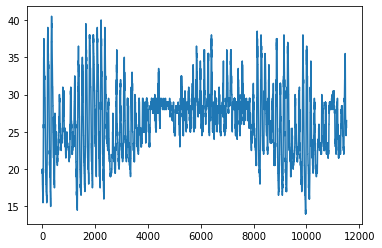

In [98]:
y_pred_result = ((Y_pred*2).astype('int32'))/2

plt.plot(y_pred_result)

y_pred_result = pd.DataFrame(y_pred_result, index = test_dt.index, columns = ['Y18'])

y_pred_result.to_csv('/content/gdrive/My Drive/Colab Notebooks/y_pred_result.csv')

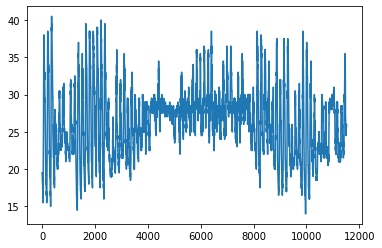

In [0]:
y_pred_result = ((Y_pred*2).astype('int32'))/2

plt.plot(y_pred_result)

y_pred_result = pd.DataFrame(y_pred_result, index = test_dt.index, columns = ['Y18'])

y_pred_result.to_csv('/content/gdrive/My Drive/Colab Notebooks/y_pred_result2.csv')